<a href="https://colab.research.google.com/github/AkothCarole/Predicting-sales/blob/master/Core_Week_6_Day_4_Supervised_Learning_with_Exploratory_Data_Analysis_Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning with Exploratory Data Analysis - Exercise 1

## 1. Defining the Question

### a) Specifying the Question


> You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want. The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out!



### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [0]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Loading the Dataset
# Dataset url = http://bit.ly/EcommerceDataset 
#
data = pd.read_csv('http://bit.ly/EcommerceDataset')
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


## 3. Checking the Data

In [0]:
# Determining the no. of records in our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [0]:
# Previewing the top of our dataset
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [0]:
# Previewing the bottom of our dataset
data.tail()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510
499,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898\nEast Drewboroug...,DarkMagenta,33.715981,12.418808,35.771016,2.735160,497.778642


In [0]:
# Checking whether each column has an appropriate datatype
data.dtypes

Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset

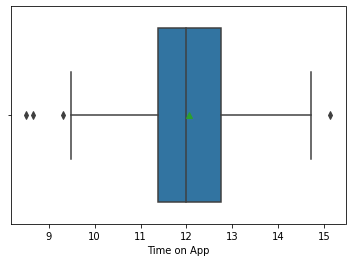

In [0]:
#Check outliers in Time spent on App
data.columns
sns.boxplot(data['Time on App'], showmeans=True)


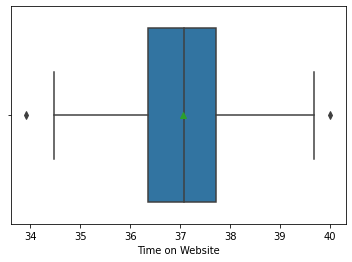

In [0]:
#Check outliers in Time spent on website
sns.boxplot(data['Time on Website'],showmeans=True)

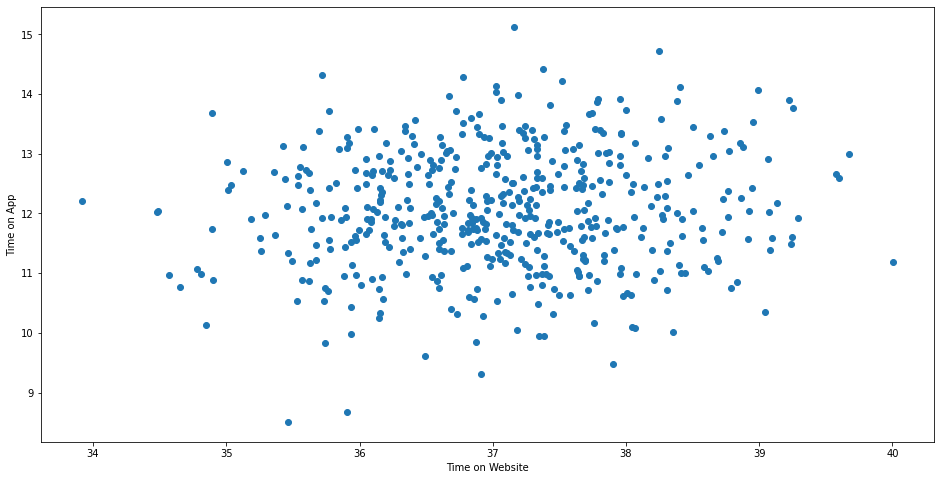

In [0]:
# Checking for Outliers using scatter plot
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['Time on Website'], data['Time on App'])
ax.set_xlabel('Time on Website')
ax.set_ylabel('Time on App')
plt.show()

In [0]:
# Checking for Anomalies (nunique function for checking no of unique values in columns)
print(data.nunique())
#Avatar has less unique values

Email                   500
Address                 500
Avatar                  138
Avg. Session Length     500
Time on App             500
Time on Website         500
Length of Membership    500
Yearly Amount Spent     500
dtype: int64


In [0]:
# Identifying the Missing Data
null_data = data.isnull().any()
null_data

Email                   False
Address                 False
Avatar                  False
Avg. Session Length     False
Time on App             False
Time on Website         False
Length of Membership    False
Yearly Amount Spent     False
dtype: bool

In [0]:
# Dealing with the Missing Data
#no Null values
data=data.dropna(how='all')
data

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [0]:
# More data cleaning procedures
#Check duplicates
duplicates_data=data.duplicated().sum()
duplicates_data

0

## 6. Exploratory Analysis

In [0]:
# Ploting the univariate summaries and recording our observations
#Check central tendacies and dispersion
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


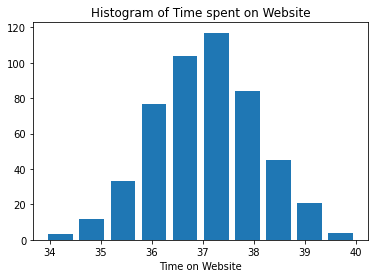

In [0]:
#Plot Univariate summaries
#Plot Time on website and Time on App
data_website = data['Time on Website']
plt.hist(data_website,bins = 10, histtype='bar',rwidth=0.8)
plt.xlabel('Time on Website')
plt.ylabel('')
plt.title('Histogram of Time spent on Website')
plt.show()

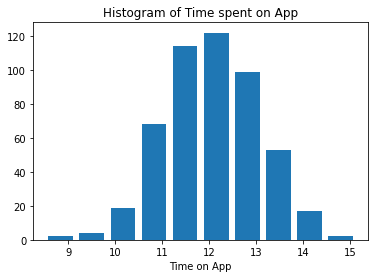

In [0]:
#PlotTime on App
data_App = data['Time on App']
plt.hist(data_App,bins = 10, histtype='bar',rwidth=0.8)
plt.xlabel('Time on App')
plt.ylabel('')
plt.title('Histogram of Time spent on App')
plt.show()

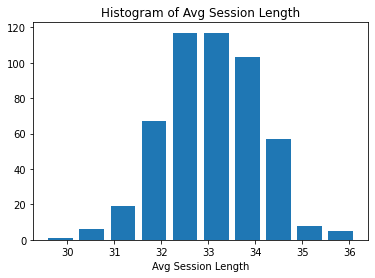

In [0]:
#Plot Time in Session
data_Session = data['Avg. Session Length']
plt.hist(data_Session,bins = 10, histtype='bar',rwidth=0.8)
plt.xlabel('Avg Session Length')
plt.ylabel('')
plt.title('Histogram of Avg Session Length')
plt.show()

## 7. Implementing the Solution

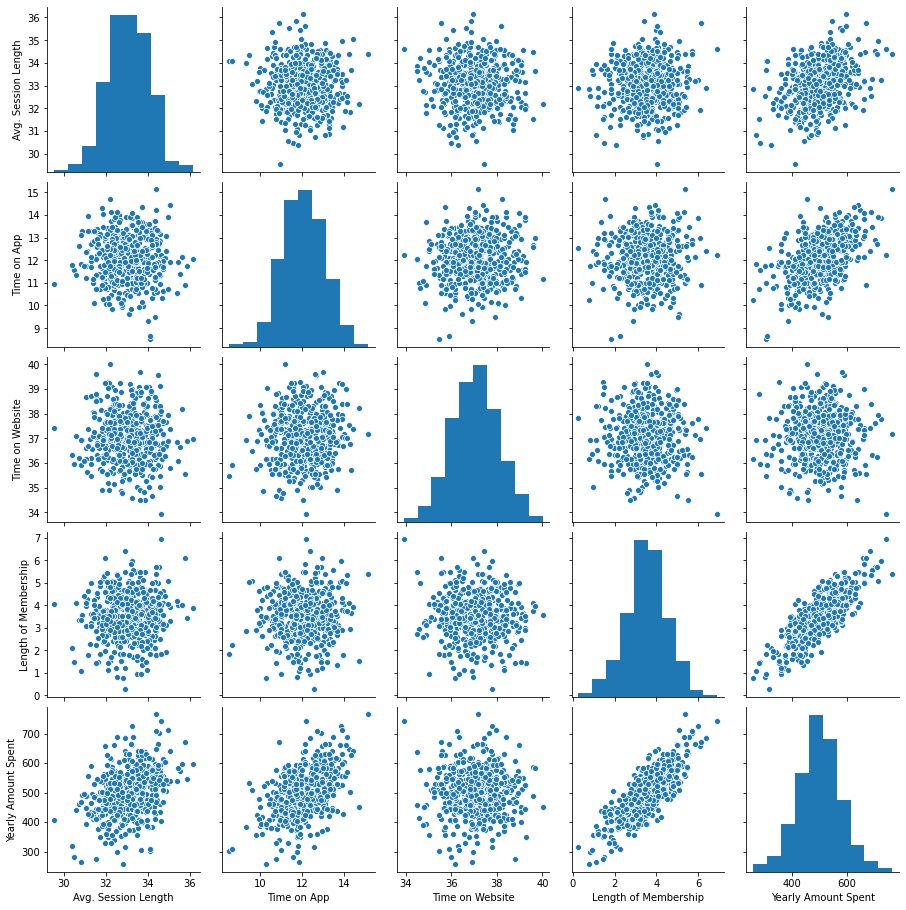

In [0]:
# Implementing the Solution
# Pair Plot

sns.pairplot(data)
plt.show()

In [0]:
#Check correlations
data.corr()
#Yearly amount spent is moderately corelated to Avg session Length
#Time on App and Yearly Spent
#Yearly Amount Spent and Length of Membership highly correlated
#Length on membership doesnt affect Time spent on App
#Session time does not affect time on App or Website
#Yealy expenditure and Timespent on App are highly correlated


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


In [0]:
#Import Libraries
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression


#Polynomial Regression
Get data Yearly spent vs time on App

In [0]:
#Polynomial Regression
#Get data Yearly spent vs time on App

In [0]:
data.head()


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [0]:
data.columns[4:5]

Index(['Time on App'], dtype='object')

In [0]:
data.columns[-1]

'Yearly Amount Spent'

In [0]:
x = data.iloc[:,4:5].values
y = data.iloc[:,-1].values
#print(X)
#print(y)

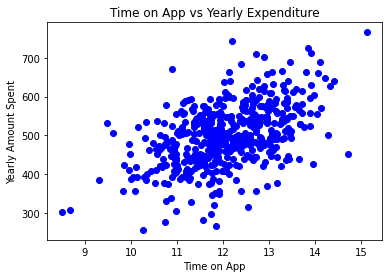

In [0]:
plt.scatter(x, y, color='blue') 
plt.title('Time on App vs Yearly Expenditure')
plt.xlabel('Time on App')
plt.ylabel('Yearly Amount Spent')
plt.show()

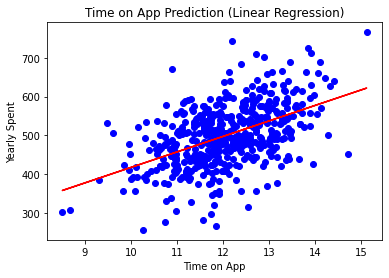

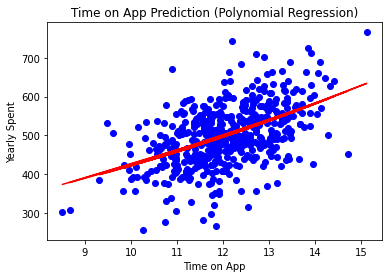

In [0]:
# Split the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(x,y, test_size = 0.2, random_state=0)


# Fit Linear Regression model to the dataset(this is optional. We are doing this for the sole purpose of comparing the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(x,y)

# Visualize the Linear Regression results
plt.scatter(x, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, reg_line.predict(x), color='red')
plt.title('Time on App Prediction (Linear Regression)')
plt.xlabel('Time on App')
plt.ylabel('Yearly Spent')
plt.show()


# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(x)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(x, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Time on App Prediction (Polynomial Regression)')
plt.xlabel('Time on App')
plt.ylabel('Yearly Spent')
plt.show()

# pol_reg.predict(poly_reg.fit_transform([[5.5]]))

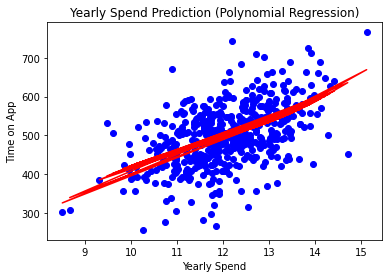

In [0]:
# Now we know where our cap is, let's decrease the degrees slightly 

# Fit polynomial Regression to the dataset
poly_reg_4 = PolynomialFeatures(degree = 4) 
X_poly = poly_reg_4.fit_transform(x)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Yearly Spend Prediction (Polynomial Regression)')
plt.xlabel('Yearly Spend')
plt.ylabel('Time on App')
plt.show()

In [0]:
# Predict using linear regression
lin_pred = reg_line.predict([[15]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg_4.fit_transform([[15]]))
print('Polynomial prediction: %d' %poly_pred)

# We can also get the predictions as an array
poly_arr_pred = pol_reg.predict(poly_reg_4.fit_transform(X))

Linear prediction: 616
Polynomial prediction: 658


In [0]:
#Polynomial Regression
#Get data Yearly spent vs time on Website

In [0]:
a = data.iloc[:,5:6].values
b = data.iloc[:,-1].values
#print(a)
#print(b)

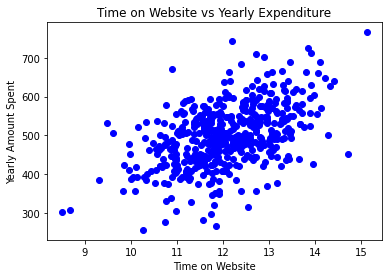

In [0]:
plt.scatter(x, y, color='blue') 
plt.title('Time on Website vs Yearly Expenditure')
plt.xlabel('Time on Website')
plt.ylabel('Yearly Amount Spent')
plt.show()

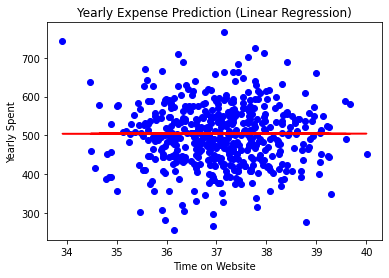

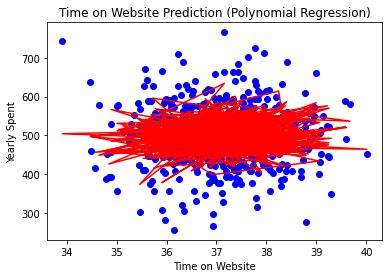

In [0]:
# Split the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(a,b, test_size = 0.2, random_state=0)


# Fit Linear Regression model to the dataset(this is optional. We are doing this for the sole purpose of comparing the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(a,b)

# Visualize the Linear Regression results
plt.scatter(a, b, color='blue')
plt.plot(a, reg_line.predict(x), color='red')
plt.title('Yearly Expense Prediction (Linear Regression)')
plt.xlabel('Time on Website')
plt.ylabel('Yearly Spent')
plt.show()


# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(x)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, b)

#Visualize the Polynomial Regression results
plt.scatter(a, y, color='blue')
plt.plot(a, pol_reg.predict(X_poly), color='red')
plt.title('Time on Website Prediction (Polynomial Regression)')
plt.xlabel('Time on Website')
plt.ylabel('Yearly Spent')
plt.show()

# pol_reg.predict(poly_reg.fit_transform([[5.5]]))

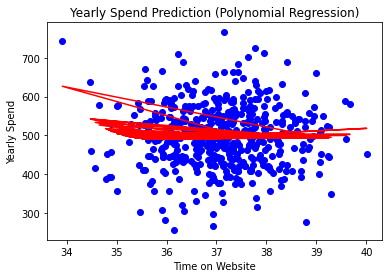

In [0]:
# Now we know where our cap is, let's decrease the degrees slightly 

# Fit polynomial Regression to the dataset
poly_reg_4 = PolynomialFeatures(degree = 4) 
X_poly = poly_reg_4.fit_transform(a)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, b)

#Visualize the Polynomial Regression results
plt.scatter(a, b, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(a, pol_reg.predict(X_poly), color='red')
plt.title('Yearly Spend Prediction (Polynomial Regression)')
plt.xlabel('Time on Website')
plt.ylabel('Yearly Spend')
plt.show()

In [0]:
# Predict using linear regression
lin_pred = reg_line.predict([[40]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg_4.fit_transform([[40]]))
print('Polynomial prediction: %d' %poly_pred)

# We can also get the predictions as an array
poly_arr_pred = pol_reg.predict(poly_reg_4.fit_transform(X))

Linear prediction: 498
Polynomial prediction: 517


#Solution Opt for App.

**Increase in time spent on App leads to more money spent yearly** 

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [0]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?